In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [167]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv',index_col=0)



In [168]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [169]:
# ['state','file_month','interview_date','interview_month','interview_day',
#             'interview_year','Annual_Sequence_number', 'final_disposition',
#             'primary_sampling_unit','correct_telephone_number']#'Primary_Sampling_Unit  (Equal to Annual Sequence Number)

In [170]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [494]:
df['IYEAR'].value_counts()

2017    34501
2018       44
Name: IYEAR, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [171]:
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [172]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [173]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [174]:
# to check if there are any colunms contain only missing values , if the number below == the number of row of the data 
# remove the colunms 
list(df.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16043,
 16043,
 34537,
 16043,
 16043,
 34537,
 16050,
 16046,
 16046,
 18502,
 18502,
 18502,
 18502,
 18502,
 34449,
 18502,
 18503,
 22612,
 0,
 0,
 0,
 16417,
 0,
 0,
 0,
 0,
 0,
 21335,
 0,
 1476,
 22126,
 0,
 0,
 0,
 0,
 29744,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30184,
 23857,
 23857,
 23857,
 23857,
 0,
 0,
 0,
 0,
 16044,
 33258,
 16043,
 0,
 0,
 0,
 316,
 437,
 576,
 652,
 28480,
 1050,
 1140,
 1219,
 1282,
 1314,
 1370,
 1438,
 20762,
 30502,
 24852,
 1498,
 1805,
 30322,
 1907,
 15435,
 15480,
 15520,
 2323,
 2422,
 2500,
 2569,
 2645,
 2737,
 3017,
 11465,
 11653,
 11696,
 11748,
 19889,
 19908,
 3375,
 3435,
 3547,
 20026,
 3611,
 13728,
 3773,
 23285,
 3868,
 24824,
 24824,
 32912,
 32912,
 32912,
 32912,
 32912,
 32927,
 32912,
 32912,
 32912,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,
 34545,


In [175]:
#remove all columns only contain missing value/naN
list_col=[]
for i in df.columns:
    
    if df[i].isnull().sum()==34545:
        list_col.append(i)


df_cleaned=df.drop(columns=list_col)
df_cleaned.shape      

(34545, 258)

In [176]:
# compare original data shape and cleaned data shape. we can see 100 colunms are removed.
df.shape

(34545, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [177]:
# descriptive statistics
df_cleaned.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,34545.000000,34545.000000,3.454500e+04,34545.000000,34545.000000,34545.000000,34545.000000,3.454500e+04,3.454500e+04,18502.0,...,34545.000000,34545.000000,34545.000000,34545.000000,34545.000000,34545.000000,34545.000000,12211.000000,12211.000000,30772.000000
mean,27.046693,6.966855,7.273633e+06,7.119323,15.229295,2017.001274,1118.428137,2.017006e+09,2.017006e+09,1.0,...,2.909654,2.651498,2.482038,3.553134,2.801216,1.850485,1.890606,2.380968,2.447875,1.844339
std,12.026461,3.479398,3.476456e+06,3.476148,8.821280,0.035667,38.771910,3.360677e+03,3.360677e+03,0.0,...,2.499531,2.528344,2.300046,2.457341,2.526893,2.409890,2.403713,2.617896,2.828682,1.347835
min,9.000000,1.000000,1.012018e+06,1.000000,1.000000,2017.000000,1100.000000,2.017000e+09,2.017000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,4.000000,4.192017e+06,4.000000,7.000000,2017.000000,1100.000000,2.017003e+09,2.017003e+09,1.0,...,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,34.000000,7.000000,8.022017e+06,8.000000,15.000000,2017.000000,1100.000000,2.017006e+09,2.017006e+09,1.0,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,36.000000,10.000000,1.021202e+07,10.000000,22.000000,2017.000000,1100.000000,2.017009e+09,2.017009e+09,1.0,...,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,36.000000,12.000000,1.231202e+07,12.000000,31.000000,2018.000000,1200.000000,2.017012e+09,2.017012e+09,1.0,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [178]:
# graphic showing those descriptive stats


In [179]:
# graphic showing the distribution of data
#import seaborn as sns
#sns.set()
#sns.pairplot(df_cleaned)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [180]:
#from the dictionary there are two different sick types  pysically sick or mentally sick
#so choose the variable of  General health is the best choice

#from IPython.display import Image
#Image(filename='image1.png',width=500,height=500)


In [207]:
# code to calculate the average number of sick days by state
# Groupby state and slect the column 'PHYSHLTH' which is  Number of Days Physical Health 
#  'MENTHLTH' means number of the days that mental health are Not Good 
num_sick_day=df_cleaned[['_STATE','MENTHLTH','PHYSHLTH']]
num_sick_day

,_STATE,MENTHLTH,PHYSHLTH
49938,9.0,2.0,88.0
49939,9.0,88.0,88.0
49940,9.0,88.0,2.0
49941,9.0,88.0,88.0
49942,9.0,88.0,88.0
...,...,...,...
303774,36.0,5.0,88.0
303775,36.0,88.0,88.0
303776,36.0,88.0,6.0
303777,36.0,88.0,88.0


In [224]:
me=pd.DataFrame(num_sick_day.groupby('_STATE')['MENTHLTH'].mean()).reset_index()
ph=pd.DataFrame(num_sick_day.groupby('_STATE')['PHYSHLTH'].mean()).reset_index()

combo=pd.merge(me,ph,how="outer",on='_STATE')
combo

,_STATE,MENTHLTH,PHYSHLTH
0,9.0,64.891103,61.325652
1,34.0,65.006406,60.884609
2,36.0,62.058372,58.610417


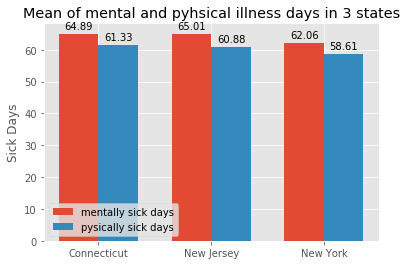

In [264]:
labels = ['Connecticut','New Jersey','New York']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, round(combo['MENTHLTH'],2), width, label='mentally sick days')
rects2 = ax.bar(x + width/2, round(combo['PHYSHLTH'],2), width, label='pysically sick days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sick Days')
ax.set_title('Mean of mental and pyhsical illness days in 3 states')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.legend(loc='lower left')
plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [317]:
#From the dictionary , I can see there are so many types of chronically sick people:
#Heart Attack/Angina or Coronary Heart Disease/Asthma/skin cancer/ 
#chronic obstructive pulmonary disease, emphysema or chronic bronchitis/depressive disorder/diabetes

# 'CVDINFR4/CVDCRHD4/ASTHMA3/CHCSCNCR/CHCCOPD1/ ADDEPEV2/DIABETE3'  we have 7 different types of chronic sickness
sickness_type=['CVDINFR4','CVDCRHD4', 'CVDSTRK3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD1','ADDEPEV2','DIABETE3','CHCKIDNY']
d1=df_cleaned[['CVDINFR4','CVDCRHD4', 'CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR','CHCCOPD1','ADDEPEV2','DIABETE3','CHCKIDNY']].reset_index()
# we can see each row has number  from (1 2 3 4 5 )if the value is 1 means the person has chronic disease
d1.head()

,index,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,DIABETE3,CHCKIDNY
0,49938,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0
1,49939,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
2,49940,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,49941,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
4,49942,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0


In [413]:
# To get the the person who have chronically sickness, if the cell value!= 1  return 0 ,if cell value = 1 return 1 
d2=[]
for i in d1.columns:
    d2.append(d1[i].apply(lambda x: 0 if x!=1 else 1 ))
    
pd.DataFrame(d2)

,0,1,2,3,4,5,6,7,8,9,...,34535,34536,34537,34538,34539,34540,34541,34542,34543,34544
index,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVDINFR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVDCRHD4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CVDSTRK3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASTHMA3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCSCNCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCOCNCR,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHCCOPD1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ADDEPEV2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
DIABETE3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
#generate a table contains different chronical skines and the frequency for each of them 
ts=pd.DataFrame(pd.DataFrame(d2).transpose().drop(columns='index').transpose().sum(axis=1)).reset_index()
ts.columns=['types','sum']
ts

,types,sum
0,CVDINFR4,1724
1,CVDCRHD4,1755
2,CVDSTRK3,1196
3,ASTHMA3,4801
4,CHCSCNCR,2808
5,CHCOCNCR,3373
6,CHCCOPD1,2566
7,ADDEPEV2,5905
8,DIABETE3,4361
9,CHCKIDNY,1172


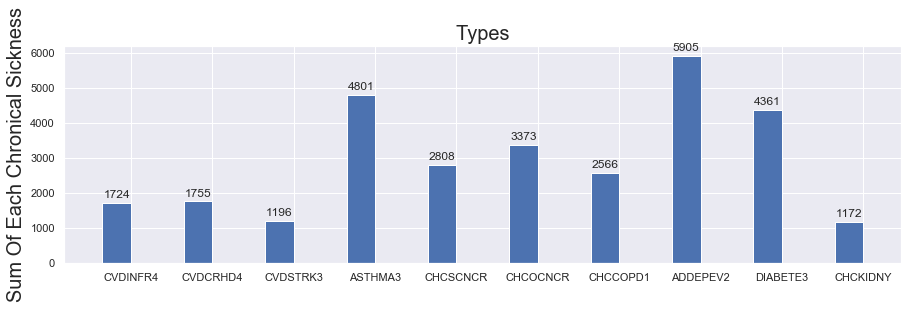

In [436]:
label = sickness_type
x = np.arange(len(label))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width/2, round(ts['sum'],2), width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sum of each chronical sickness'.title(),fontsize=20)
ax.set_title('types'.title(),fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(label)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.show()

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [32]:
# code to calculate averages per state
spas=df_cleaned.groupby('_STATE')['chro_dummy'].value_counts()

# what does average mean? means expectation? or ? 

In [510]:
chro_state=pd.DataFrame(df_cleaned.groupby('_STATE')['chro_dummy'].value_counts(normalize=True))
chro_state

chro_dummy
_STATE chro_dummy            
9.0    0             0.544295
       1             0.455705
34.0   0             0.545866
       1             0.454134
36.0   0             0.572700
       1             0.427300

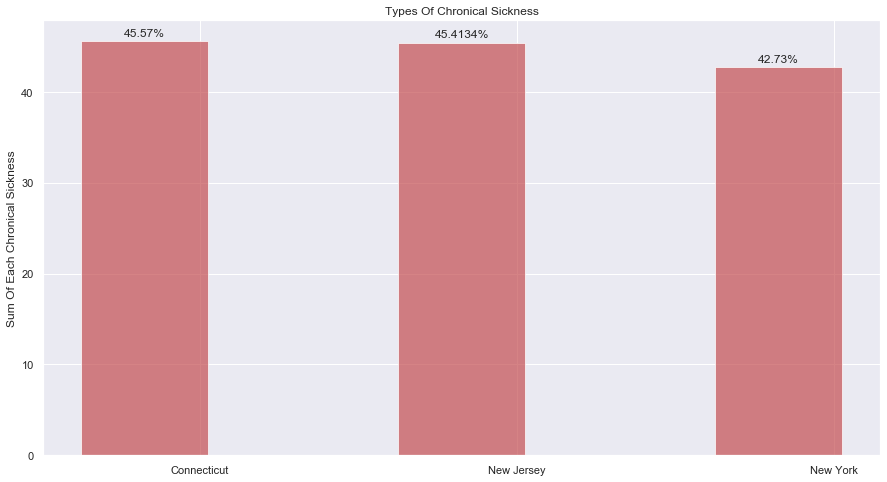

In [508]:
# create graphic to compare chronically sick by state
label2 = ['Connecticut','New Jersey','New York']
percentage=[45.57,45.4134,42.7300]
x = np.arange(len(label2))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, percentage, width=0.4,color='r',alpha=0.7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sum of each chronical sickness'.title())
ax.set_title('Types of Chronical Sickness'.title())
ax.set_xticks(x)
ax.set_xticklabels(label2)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values. check
2. Calculate the descriptive statistics of the variable. check
3. Generate a histogram for the variable. check
4. Generate graphics that show how the responses to this variable might differ by state. check
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [495]:
#select the columns we need 
data6=df_cleaned[['_STATE','IYEAR','SMOKDAY2','PHYSHLTH']].reset_index()
data6.head()

,index,_STATE,IYEAR,SMOKDAY2,PHYSHLTH
0,49938,9.0,2017,NaN,88.0
1,49939,9.0,2017,NaN,88.0
2,49940,9.0,2017,NaN,2.0
3,49941,9.0,2017,NaN,88.0
4,49942,9.0,2017,3.0,88.0


In [496]:
# check how many null inside the data6
data6.isnull().sum()

index           0
_STATE          0
IYEAR           0
SMOKDAY2    20762
PHYSHLTH        0
dtype: int64

In [497]:
#remove all NaN values for data6 
data6_na=data6.dropna(axis=0)
data6_drop=data6_na.drop(columns='index')
#double check if our data already cleaned 
data6_drop.isnull().sum()

_STATE      0
IYEAR       0
SMOKDAY2    0
PHYSHLTH    0
dtype: int64

In [500]:
#for the index
data6_c=data6_drop.reset_index(drop=True).copy()
data6_clean=data6_c[data6_c['IYEAR']==2017]
data6_clean.head()

,_STATE,IYEAR,SMOKDAY2,PHYSHLTH
0,9.0,2017,3.0,88.0
1,9.0,2017,3.0,88.0
2,9.0,2017,3.0,28.0
3,9.0,2017,3.0,88.0
4,9.0,2017,3.0,88.0


In [480]:
data6_clean.columns

Index(['_STATE', 'SMOKDAY2', 'PHYSHLTH'], dtype='object')

In [488]:
data6_clean['SMOKDAY2']=data6_clean['SMOKDAY2'].apply(lambda x: 1 if (x ==1.0 or x == 2.0)  else 0)
data6_clean['PHYSHLTH']=data6_clean['PHYSHLTH'].apply(lambda x: x if x in range(1,31)  else 0)

In [489]:
data6_clean.head()

,_STATE,SMOKDAY2,PHYSHLTH
0,9.0,0,0.0
1,9.0,0,0.0
2,9.0,0,28.0
3,9.0,0,0.0
4,9.0,0,0.0


In [490]:
s_smk=pd.DataFrame(data6_clean.groupby('_STATE')['SMOKDAY2'].sum()).reset_index()
s_phy=pd.DataFrame(data6_clean.groupby('_STATE')['PHYSHLTH'].sum()).reset_index()
combo1=pd.merge(s_smk,s_phy,how="outer",on='_STATE')
combo1

,_STATE,SMOKDAY2,PHYSHLTH
0,9.0,1064,19824.0
1,34.0,1411,25570.0
2,36.0,1572,24039.0


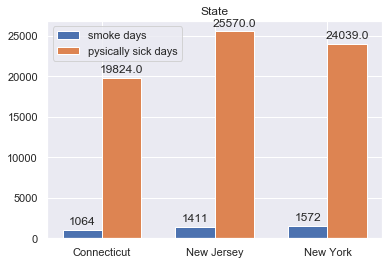

In [487]:
label6 = ['Connecticut','New Jersey','New York']
x = np.arange(len(label6))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, combo1['SMOKDAY2'], width, label='smoke days')
rects2 = ax.bar(x + width/2, combo1['PHYSHLTH'], width, label='pysically sick days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('State')
ax.set_xticks(x)
ax.set_xticklabels(label6)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.legend(loc='upper left')
plt.show()

In [85]:
data6_clean['PHYSHLTH']=data6_clean['PHYSHLTH'].map(lambda x: x if x in range(1,31) else 0)

In [86]:
#  Set Up Dummy variable accroding the to dictionary 1 and 2 mean smoke every 
#and often and other number means not sure or do not know 
data6_clean['SMOKDAY2']=data6_clean['SMOKDAY2'].map(lambda x: 1 if x==1.0 or x==2.0 else 0)
data6_clean['SMOKDAY2']

0        0
1        0
2        0
3        0
4        0
        ..
13778    0
13779    0
13780    0
13781    1
13782    0
Name: SMOKDAY2, Length: 13783, dtype: int64

In [87]:
# updated data6_clean
data6_clean.head()


,_STATE,SMOKDAY2,PHYSHLTH
0,9.0,0,0.0
1,9.0,0,0.0
2,9.0,0,28.0
3,9.0,0,0.0
4,9.0,0,0.0


In [88]:
#Calculate the descriptive statistics of the variable.
data6_clean.describe()

,_STATE,SMOKDAY2,PHYSHLTH
count,13783.000000,13783.000000,13783.000000
mean,26.907785,0.293623,5.037583
std,12.067410,0.455438,9.453821
min,9.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,34.000000,0.000000,0.000000
75%,36.000000,1.000000,5.000000
max,36.000000,1.000000,30.000000


In [91]:
#4.Generate graphics that show how the responses to this variable might differ by state. check
#state_name=[9:'Connecticut',34:'New Jersey',35:'New York'] 
data6_clean.groupby('_STATE')['SMOKDAY2'].sum()

#  smokedays od NY is  NO.1

_STATE
9.0     1064
34.0    1411
36.0    1572
Name: SMOKDAY2, dtype: int64

In [89]:
##assign independent and dependent variables
x_smk=data6_clean['SMOKDAY2'] # independent Frequency of Days Now Smoking
y_phy=data6_clean['PHYSHLTH'] # dependent

In [77]:
#import the relevant library
import statsmodels.api as sm

x = sm.add_constant(x_smk)
results = sm.OLS(y_phy,x).fit()
results.summary()

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PHYSHLTH   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     114.9
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.08e-26
Time:                        01:40:56   Log-Likelihood:                -50462.
No. Observations:               13783   AIC:                         1.009e+05
Df Residuals:                   13781   BIC:                         1.009e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4835      0.095     46.988      0.000       4.296       4.670
SMOKDAY2       1.8872      0.176     10.717      0.000       1.542       2.232
==============================================================================
Omnibus:                     4466.601   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10669.235
Skew:                           1.881   Prob(JB):                         0.00
Kurtosis:                       5.105   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  